In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
pip 20.2.4 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep],
                         outputs = [output, output2])

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
_______________________________________________________________________________________

In [8]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], [y_train, y_train],
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 3.2816 - dense_2_loss: 1.5695 - dense_3_loss: 1.7122 - val_loss: 1.3023 - val_dense_2_loss: 0.6008 - val_dense_3_loss: 0.7015
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 1.0970 - dense_2_loss: 0.4967 - dense_3_loss: 0.6003 - val_loss: 1.0512 - val_dense_2_loss: 0.4674 - val_dense_3_loss: 0.5837
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.9728 - dense_2_loss: 0.4297 - dense_3_loss: 0.5431 - val_loss: 0.9811 - val_dense_2_loss: 0.4335 - val_dense_3_loss: 0.5476
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.9061 - dense_2_loss: 0.4047 - dense_3_loss: 0.5014 - val_loss: 0.9114 - val_dense_2_loss: 0.4080 - val_dense_3_loss: 0.5033
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8585 - dense_2_loss: 0.3851 - dense_3_loss: 0.4734 - val_loss: 0.8875 - val_dense_2_loss: 0.3979 - val_dense_3_loss: 0.

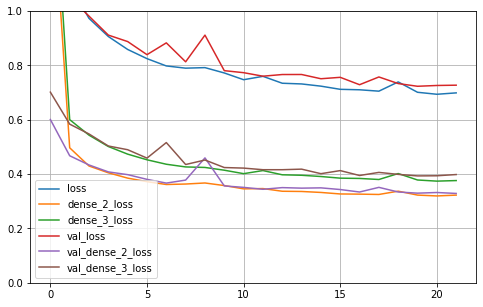

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [10]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

162/162 [==============================] - 0s 771us/step - loss: 0.7483 - dense_2_loss: 0.3486 - dense_3_loss: 0.3997


[0.748264491558075, 0.3486097753047943, 0.39965471625328064]